In [132]:
import subprocess
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
src_path = str(pathlib.Path().resolve().parents[1]) # calcula path a directorio src
subprocess.run(["make"], cwd = src_path + "/cpp") # build del cpp

make: Nothing to be done for 'all'.


CompletedProcess(args=['make'], returncode=0)

# Experimento (1)

In [134]:
def crear_competencia(cant_participantes, cant_partidos):
    # dada una cantidad de participante y de partidos
    # crea 4 np array:
    # lista de ganadores de cada partido
    # lista de perdedores de cada partido
    # lista de 1's(puntaje de los ganadores)
    # lista de 0's(puntaje de los perdedores)
    
    ganadores = np.random.choice(cant_participantes, cant_partidos, replace = True)

    perdedores = np.array([])

    for g in ganadores:

        perdedores = np.append(perdedores, 
                               np.random.choice(np.delete(np.arange(cant_participantes), g)))

    perdedores = perdedores.astype(int)
        
    puntajeG = np.ones(cant_partidos, dtype = int)
    puntajeP = np.zeros(cant_partidos, dtype = int)
    
    return ganadores+1, perdedores+1, puntajeG, puntajeP

def escribir_tabla(file_name, cant_participantes, cant_partidos, g, p, pg, pp):
    # dada 4 listas: lista de ganadores, perdedores, 
    # puntaje ganadores y puntaje perdedores,
    # y dado la cantidad de participantes y de partidos, junto a un nombre de archivo
    # genera el archivo "file_name" con la tabla de la competencia(formato enunciado)
    
    with open(file_name,"w") as file:
    
        file.write(str(cant_participantes) + " " + str(cant_partidos))

        for i in range(cant_partidos):

            file.write("\n" + "1 " + str(g[i]) + " " + str(pg[i]) + 
                       " " + str(p[i]) + " " + str(pp[i]))

In [135]:
def leer_ranking(file_name):
    # Dada la direccion de un archivo con el ranking
    # resultado de una competencia, devuelve un arreglo
    # con el rating ordenado por numero de competidor
    
    with open(file_name, "r") as file:
        
        str_out = file.read()
        
    out = []
    
    word = ""
    
    for c in str_out:
        
        if c != "\n":
            
            word += c
            
        else:
            
            out.append(float(word))
            word = ""
        
    return np.array(out)

In [136]:
def calcular_ranking(file_in, file_out, mode = "0"):
    
    # Dado en archivo en formato tabla, procesa los datos con CMM, WP o RPI y
    # los escribe en un archivo de salida en el directorio local
    
    # Corre test
    src_path = str(pathlib.Path().resolve().parents[1]) # calcula path a directorio src
    local_path = str(pathlib.Path().resolve()) # calcula path directorio local
    tabla_path = "/" + file_in
    res_path = "/" + file_out

    subprocess.run(["./tp1", local_path + tabla_path, 
                             local_path + res_path, 
                               mode], 
                   cwd = src_path + "/cpp")

In [144]:
def experimento_1(cant_participantes, cant_partidos):
    # Dada una cantidad de participantes y partidos
    # crea un torneo con dicha cantidad de participantes y partidos
    # Luego simula que el Grupo A ya termino sus partidos y
    # que se encuentran jugando los equipos del Grupo B
    # Con esto se analiza el comportamiento de ranking (rating y posicion)
    # de un equipo del grupo A (el que tiene indice 1 en la tabla) y
    # devuelve una lista con el historial de ranking de dicho equipo

    # Grupo A
    gA, pA, pgA, ppA = crear_competencia(cant_participantes//2, cant_partidos//2)

    # Grupo B
    gB, pB, pgB, ppB = crear_competencia(cant_participantes//2, cant_partidos//2)

    g = np.append(gA, gB+(cant_participantes//2))
    p = np.append(pA, pB+(cant_participantes//2))
    pg = np.append(pgA, pgB)
    pp = np.append(ppA, ppB)

    ratings_h = []
    poss_h = []

    for n_partido in range(cant_partidos//2, cant_partidos):

        file_in = "torneos/exp_1_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
        file_out = "torneos/res_1_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

        # Escribo archivo
        escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp)

        # Calculo ranking
        calcular_ranking(file_in,file_out)

        # Leo ranking
        res = leer_ranking(file_out)

        ratings_h.append(res[0])
        pos_h = 1

        for r in res: 

            if r > res[0]: pos_h+=1

        poss_h.append(pos_h)
        
    return ratings_h, poss_h

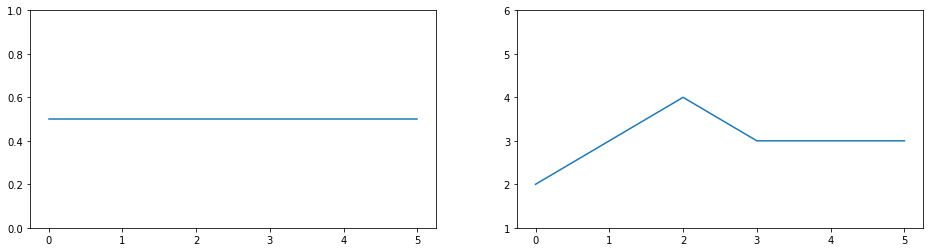

In [184]:
np.random.seed(8)

cant_participantes = 6
cant_partidos = 12

rating, pos = experimento_1(cant_participantes,cant_partidos)

plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.plot(rating)
plt.xticks(list(range(cant_partidos//2)))
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.plot(pos)
plt.xticks(list(range(cant_partidos//2)))
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()

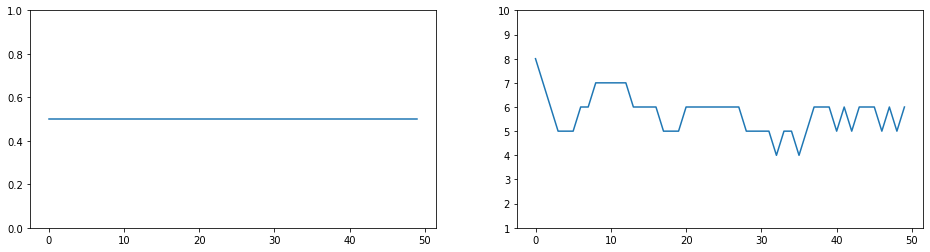

In [185]:
cant_participantes = 10
cant_partidos = 100

rating, pos = experimento_1(cant_participantes,cant_partidos)

plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.plot(rating)
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.plot(pos)
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()

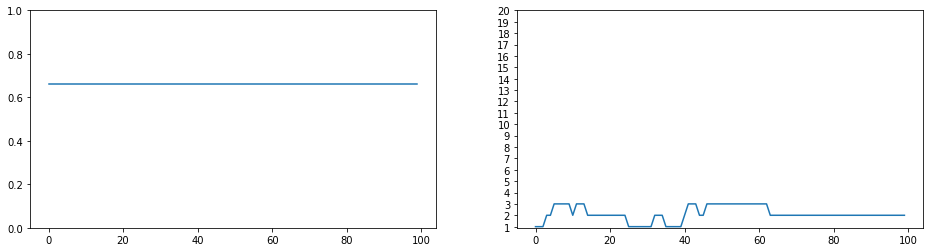

In [186]:
cant_participantes = 20
cant_partidos = 200

rating, pos = experimento_1(cant_participantes,cant_partidos)

plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.plot(rating)
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.plot(pos)
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()